# Make HST RGB plots

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
from astropy.io import fits
from reproject import reproject_exact,reproject_interp
from astropy.wcs import WCS
from make_rgb_image import make_rgb_image
#import seaborn as sns
#sns.set(style='dark')

## AS1063

<IPython.core.display.Javascript object>


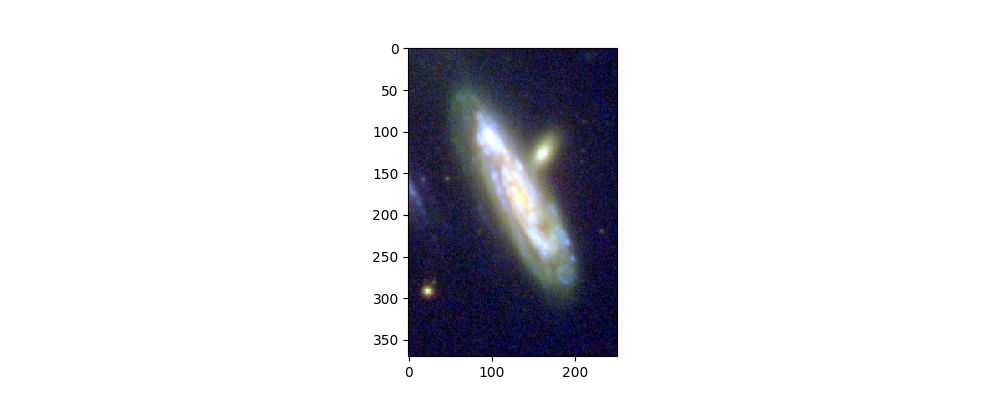

<IPython.core.display.Javascript object>


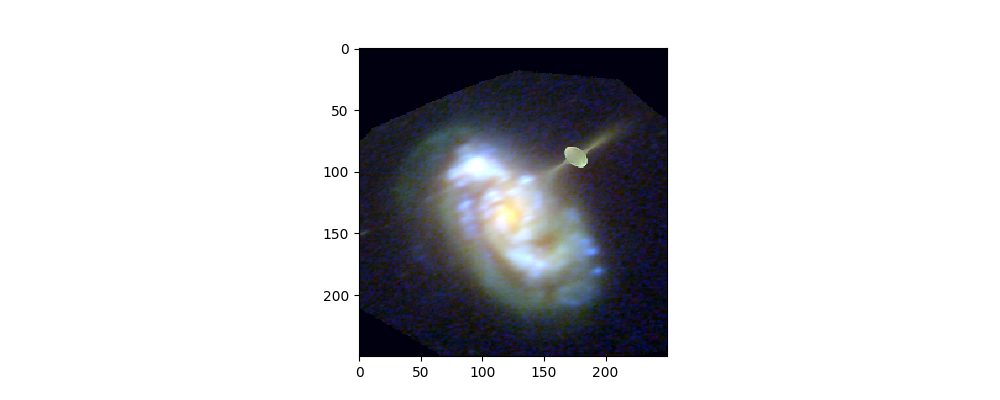

In [2]:
red = fits.getdata('../Data/HST/AS1063_F160w.fits')
green = fits.getdata('../Data/HST/AS1063_F814w.fits')
blue =  fits.getdata('../Data/HST/AS1063_F435w.fits')
rgb_ip = make_rgb_image(red,green,blue, max_p=(99.5, 99.5, 98))
ip_header = fits.getheader('../Data/HST/AS1063_F160w.fits')
fits.writeto('AS1063_RGB_160_814_435.fits',rgb_ip,ip_header,overwrite=True)

red = fits.getdata('../Data/Lensing/AS1063/SP_HST/SP_AS1063_F160w.fits')
green = fits.getdata('../Data/Lensing/AS1063/SP_HST/SP_AS1063_F814w.fits')
blue = fits.getdata('../Data/Lensing/AS1063/SP_HST/SP_AS1063_F435w.fits')
rgb_sp = make_rgb_image(red,green,blue, max_p=(99.5, 99.5, 98))
sp_header = fits.getheader('../Data/Lensing/AS1063/SP_HST/SP_AS1063_F160w.fits')
fits.writeto('SP_AS1063_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)

fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.imshow(rgb_ip)
fig.savefig('AS1063_RGB_160_814_435.jpg')

fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.imshow(rgb_sp)
fig.savefig('SP_AS1063_RGB_160_814_435.jpg')

In [4]:
## Align with MUSE data

<IPython.core.display.Javascript object>


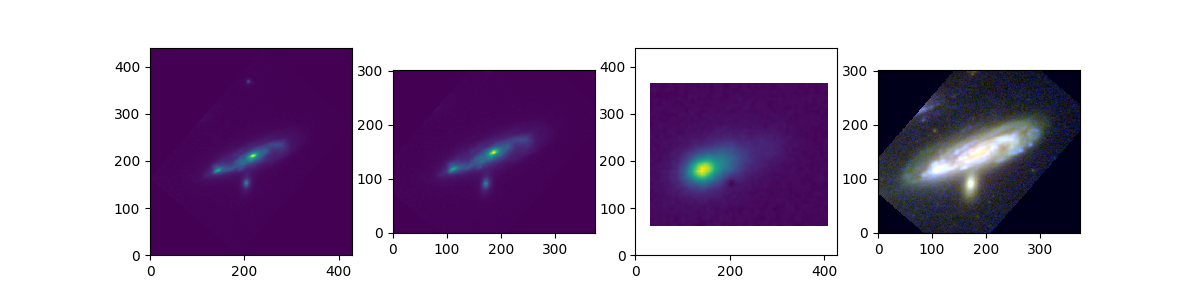

In [75]:
from mpdaf.obj import Image
red = Image('../Data/HST/AS1063_F160w.fits')
green = Image('../Data/HST/AS1063_F814w.fits')
blue =  Image('../Data/HST/AS1063_F435w.fits')

# Rotate
red = red.rotate(-41.0,reshape=True)
green = green.rotate(-41.0,reshape=True)
blue = blue.rotate(-41.0,reshape=True)

# Get MUSE footprint to match our HST to it
red.write('test.fits',savemask=None)
muse, footprint = reproject_interp('../Data/Images/AS1063/Im_AS1063_OII_ContSub_CMSub.fits',fits.getheader('test.fits',ext=1),hdu_in=1)
footprint_idx = np.where(footprint==1)
min_x,max_x = footprint_idx[0][0],footprint_idx[0][-1]
min_y,max_y = footprint_idx[1][0],footprint_idx[1][-1]

# Crop images
red_cropped = red.data.data[min_x:max_x,min_y:max_y]
green_cropped = green.data.data[min_x:max_x,min_y:max_y]
blue_cropped = blue.data.data[min_x:max_x,min_y:max_y]

# Make RGB image
rgb_ip = make_rgb_image(red_cropped,green_cropped,blue_cropped, max_p=(99.5, 99.5, 98))
ip_header = fits.getheader('../Data/HST/AS1063_F160w.fits')
fits.writeto('AS1063_RGB_160_814_435_aligned.fits',rgb_ip,ip_header,overwrite=True)


fig, ax = plt.subplots(1,4,figsize=(12,3))
ax[0].imshow(red.data.data,origin='lower')
ax[1].imshow(red_cropped,origin='lower')
ax[2].imshow(muse,origin='lower')
ax[3].imshow(rgb_ip,origin='lower')

<IPython.core.display.Javascript object>


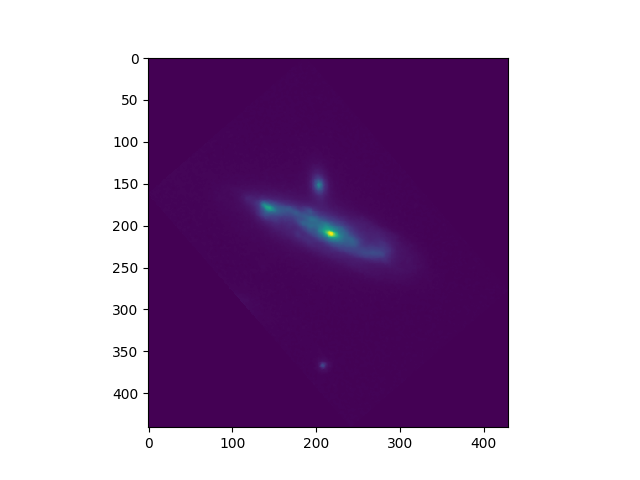

<IPython.core.display.Javascript object>


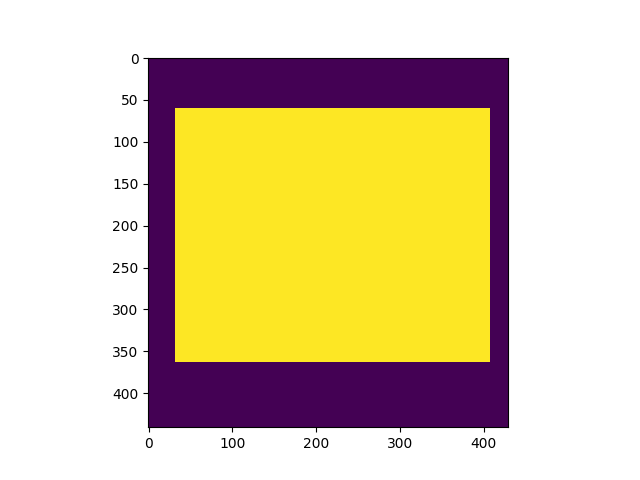

In [58]:
test = fits.getdata('test.fits')
plt.figure()
plt.imshow(test)

plt.figure()
plt.imshow(footprint)

<IPython.core.display.Javascript object>


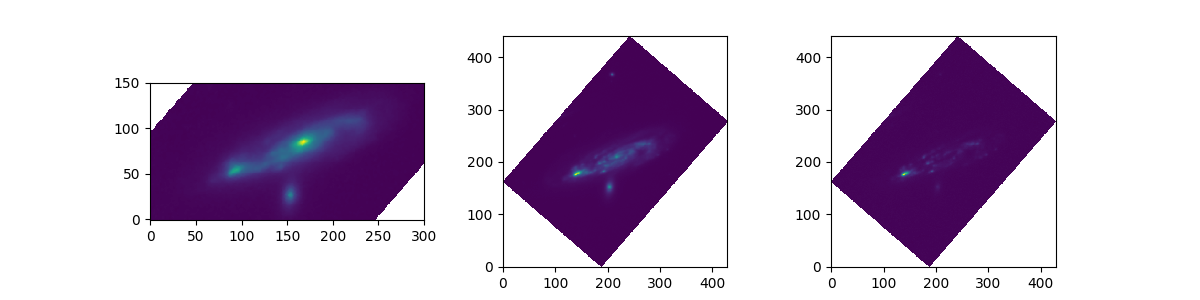

In [37]:
from mpdaf.obj import Image
red = Image('../Data/HST/AS1063_F160w.fits')
green = Image('../Data/HST/AS1063_F814w.fits')
blue =  Image('../Data/HST/AS1063_F435w.fits')

# Rotate
red = red.rotate(-41.0,reshape=True)
green = green.rotate(-41.0,reshape=True)
blue = blue.rotate(-41.0,reshape=True)

# Crop
red = red[125:275,50:350]

fig, ax = plt.subplots(1,3,figsize=(12,3))
ax[0].imshow(red.data,origin='lower')
ax[1].imshow(green.data,origin='lower')
ax[2].imshow(blue.data,origin='lower')

#rgb_ip = make_rgb_image(red,green,blue, max_p=(99.5, 99.5, 98))
#ip_header = fits.getheader('../Data/HST/AS1063_F160w.fits')
#fits.writeto('AS1063_RGB_160_814_435.fits',rgb_ip,ip_header,overwrite=True)



## A370

<IPython.core.display.Javascript object>


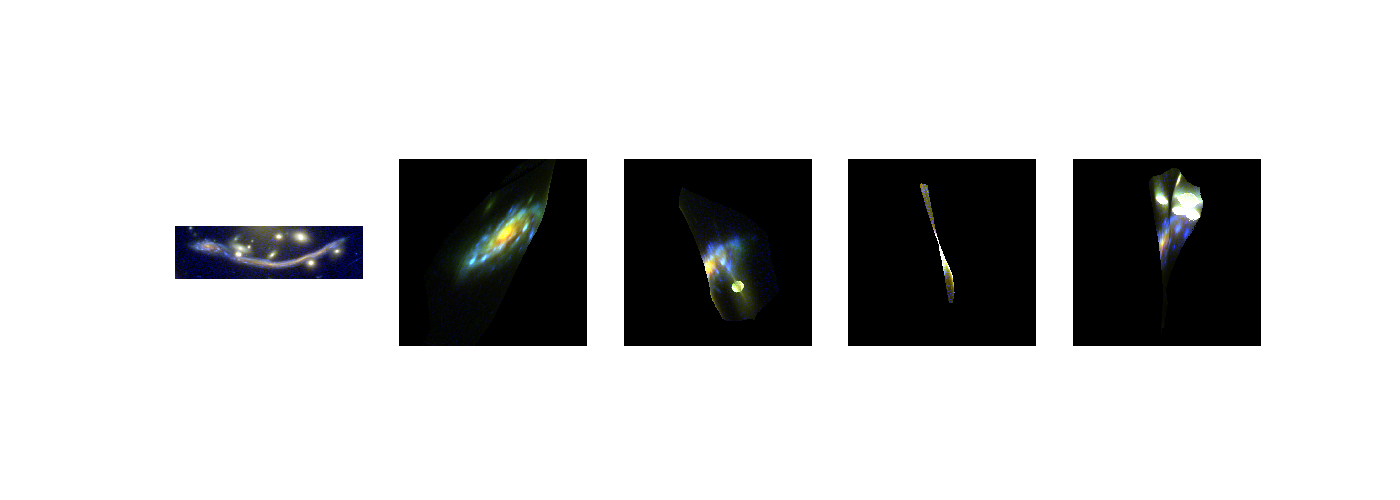

In [74]:
red = fits.getdata('../Data/HST/A370_F160w.fits')
green = fits.getdata('../Data/HST/A370_F814w.fits')
blue =  fits.getdata('../Data/HST/A370_F435w.fits')
rgb_ip = make_rgb_image(red,green,blue)
ip_header = fits.getheader('../Data/HST/A370_F160w.fits')
#fits.writeto('A370_RGB_160_814_435.fits',rgb_ip,ip_header,overwrite=True)

red = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F160w_head.fits')
green = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F814W_head.fits')
blue = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F435W_head.fits')
rgb_sp = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.9, 99.9, 99.9))
sp_header = fits.getheader('../Data/Lensing/A370/SP_HST/SP_A370_F160w_head.fits')
#fits.writeto('SP_A370_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)

red = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F160w_reg3.fits')
green = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F814w_reg3.fits')
blue = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F435w_reg3.fits')
rgb_sp_reg3 = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.9, 99.9, 99.9))
sp_header_reg3 = fits.getheader('../Data/Lensing/A370/SP_HST/SP_A370_F160w_reg3.fits')
fits.writeto('SP_A370_RGB_160_814_435_reg3.fits',rgb_sp_reg3,sp_header_reg3,overwrite=True)

red = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F160w_reg2.fits')
green = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F814w_reg2.fits')
blue = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F435w_reg2.fits')
rgb_sp_reg2 = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.9, 99.9, 99.9))
sp_header_reg2 = fits.getheader('../Data/Lensing/A370/SP_HST/SP_A370_F160w_reg3.fits')
fits.writeto('SP_A370_RGB_160_814_435_reg2.fits',rgb_sp_reg2,sp_header_reg2,overwrite=True)


red = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F160w_reg1.fits')
green = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F814w_reg1.fits')
blue = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F435w_reg1.fits')
rgb_sp_reg1 = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.5, 99.4, 99.5))
sp_header_reg1 = fits.getheader('../Data/Lensing/A370/SP_HST/SP_A370_F160w_reg3.fits')
fits.writeto('SP_A370_RGB_160_814_435_reg1.fits',rgb_sp_reg1,sp_header_reg1,overwrite=True)


fig, ax = plt.subplots(1,5,figsize=(14,5))
ax[0].imshow(rgb_ip,origin='lower')
ax[1].imshow(rgb_sp[200:-200,200:-200],origin='lower')
ax[2].imshow(rgb_sp_reg3[200:-200,200:-200],origin='lower')
ax[3].imshow(rgb_sp_reg2[200:-200,200:-200],origin='lower')
ax[4].imshow(rgb_sp_reg1[200:-200,200:-200],origin='lower')

dummy = [x.axis('off') for x in ax]

<IPython.core.display.Javascript object>


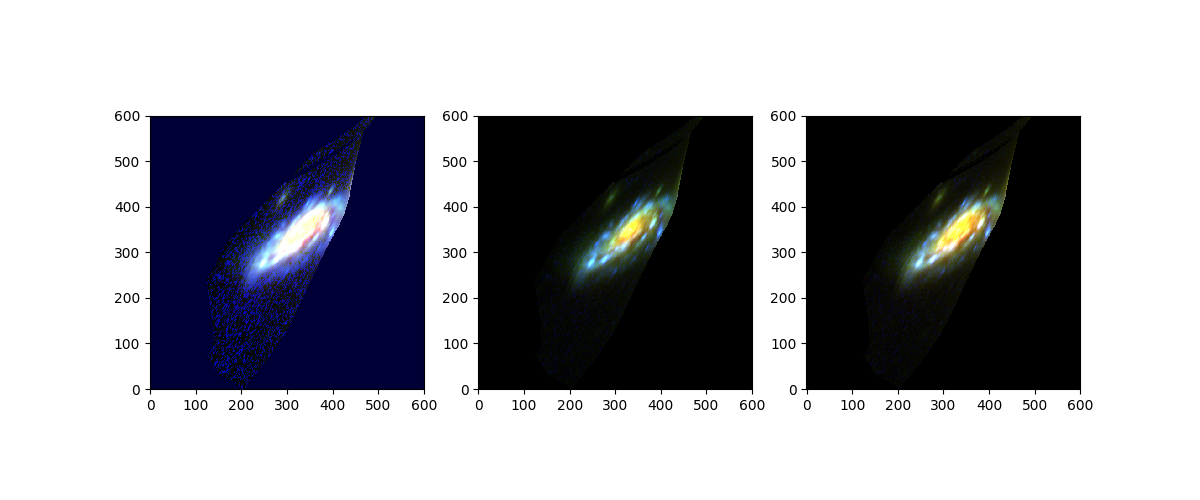

In [53]:
fig, ax = plt.subplots(1,3,figsize=(12,5))

red = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F160w_head.fits')
green = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F814W_head.fits')
blue = fits.getdata('../Data/Lensing/A370/SP_HST/SP_A370_F435W_head.fits')

rgb_sp = make_rgb_image(red,green,blue)
ax[0].imshow(rgb_sp[200:-200,200:-200],origin='lower')

rgb_sp = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.9, 99.9, 99.9))
ax[1].imshow(rgb_sp[200:-200,200:-200],origin='lower')

rgb_sp = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.7, 99.8, 99.9))
ax[2].imshow(rgb_sp[200:-200,200:-200],origin='lower')

## MACS1206

<IPython.core.display.Javascript object>


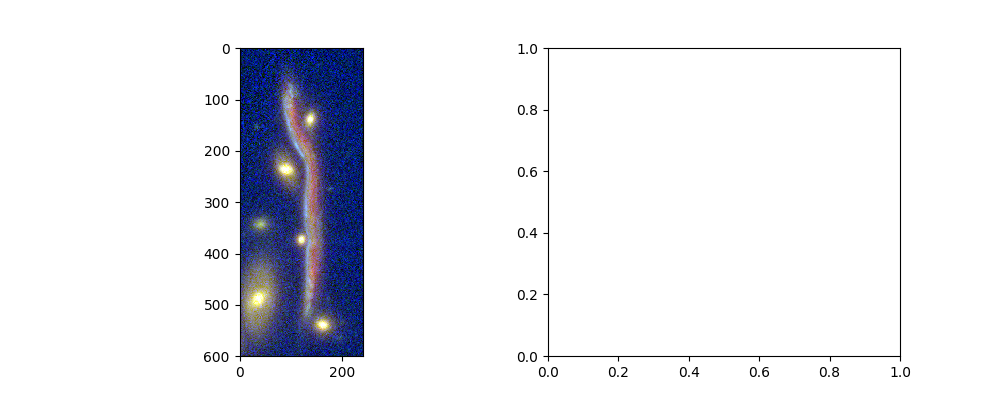

In [10]:
red = fits.getdata('../Data/HST/MACS1206_arc_F160w.fits')
green = fits.getdata('../Data/HST/MACS1206_arc_F814w.fits')
blue =  fits.getdata('../Data/HST/MACS1206_arc_F435w.fits')
rgb_ip = make_rgb_image(red,green,blue)
ip_header = fits.getheader('../Data/HST/MACS1206_arc_F160w.fits')
fits.writeto('MACS1206_arc_RGB_160_814_435.fits',rgb_ip,ip_header,overwrite=True)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(rgb_ip)

<IPython.core.display.Javascript object>


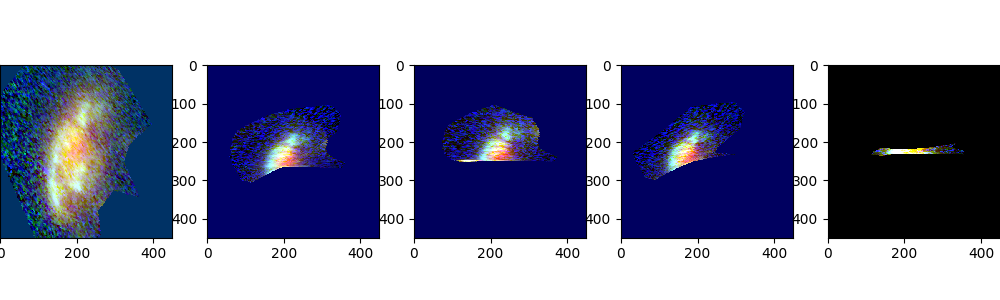

In [36]:
red = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F814W.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F435W.fits')
rgb_sp = make_rgb_image(red,green,blue)
sp_header = fits.getheader('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W.fits')
fits.writeto('SP_MACS1206_arc_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)

red = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W_north.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F814W_north.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F435W_north.fits')
rgb_sp_north = make_rgb_image(red,green,blue)
sp_header = fits.getheader('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W_north.fits')
fits.writeto('SP_MACS1206_arc_north_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)

red = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W_south.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F814W_south.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F435W_south.fits')
rgb_sp_south = make_rgb_image(red,green,blue)
sp_header = fits.getheader('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W_south.fits')
fits.writeto('SP_MACS1206_arc_south_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)

red = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W_mi.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F814W_mi.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F435W_mi.fits')
rgb_sp_mi = make_rgb_image(red,green,blue)
sp_header = fits.getheader('../Data/Lensing/MACS1206/SP_HST/SP_MACS1206_arc_F160W_mi.fits')
fits.writeto('SP_MACS1206_arc_mi_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)

red = fits.getdata('../Data/Lensing/MACS1206/SourcePlane_MACS1206_ci_F160w.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SourcePlane_MACS1206_ci_F814w.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SourcePlane_MACS1206_ci_F435w.fits')
rgb_sp_ci = make_rgb_image(red,green,blue)
sp_header = fits.getheader('../Data/Lensing/MACS1206/SourcePlane_MACS1206_ci_F160w.fits')
fits.writeto('SP_MACS1206_ci_RGB_160_814_435.fits',rgb_sp,sp_header,overwrite=True)


fig, ax = plt.subplots(1,5,figsize=(10,3))
fig.subplots_adjust(left=0,right=1)
ax[0].imshow(rgb_sp_ci)
ax[1].imshow(rgb_sp)
ax[2].imshow(rgb_sp_north)
ax[3].imshow(rgb_sp_south)
ax[4].imshow(rgb_sp_mi)

<IPython.core.display.Javascript object>


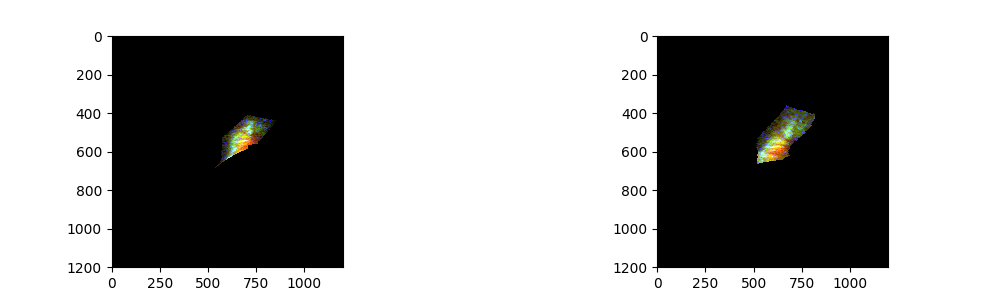

In [81]:
red = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_reg1_MACS1206_arc_F160w.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_reg1_MACS1206_arc_F814W.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_reg1_MACS1206_arc_F435W.fits')
rgb_sp_north = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.9, 99.9, 99.9))
sp_header = fits.getheader('../Data/Lensing/MACS1206/SP_HST/SP_reg1_MACS1206_arc_F160w.fits')
fits.writeto('SP_MACS1206_RGB_160_814_435_reg1.fits',rgb_sp_north,sp_header,overwrite=True)

red = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_reg2_MACS1206_arc_F160w.fits')
green = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_reg2_MACS1206_arc_F814W.fits')
blue = fits.getdata('../Data/Lensing/MACS1206/SP_HST/SP_reg2_MACS1206_arc_F435W.fits')
rgb_sp_south = make_rgb_image(red,green,blue,min_p=(10, 10, 10),max_p=(99.9, 99.9, 99.9))
sp_header = fits.getheader('../Data/Lensing/MACS1206/SP_HST/SP_reg2_MACS1206_arc_F160w.fits')
fits.writeto('SP_MACS1206_RGB_160_814_435_reg2.fits',rgb_sp_south,sp_header,overwrite=True)

fig, ax = plt.subplots(1,2,figsize=(10,3))
fig.subplots_adjust(left=0,right=1)
ax[0].imshow(rgb_sp_north)
ax[1].imshow(rgb_sp_south)